In [4]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
attention_json_path = '../reports/thesis/attention/id-7-epoch-10.json'

In [11]:
with open(attention_json_path, 'r') as f:
    attention_weights = json.load(f)
attention_weights

{'input_tokens': ['{',
  'if',
  '(',
  'obj',
  'instanceof',
  'same',
  'character',
  'instance',
  ')',
  '{',
  'same',
  'character',
  'instance',
  'that',
  '=',
  '(',
  'same',
  'character',
  'instance',
  ')',
  'obj',
  ';',
  'return',
  'i',
  '==',
  'that',
  '.',
  'i',
  ';',
  '}',
  'return',
  'false',
  ';',
  '}'],
 'output_tokens': ['equals', '<eos>'],
 'weights': [[0.015497001819312572, 0.024791140109300613],
  [0.006975153926759958, 0.0018520159646868706],
  [0.003984583076089621, 0.0023453242611140013],
  [0.08951330929994583, 0.14216552674770355],
  [0.13959024846553802, 0.04710224270820618],
  [0.053010862320661545, 0.13524000346660614],
  [0.03845122084021568, 0.09187961369752884],
  [0.016327155753970146, 0.032312795519828796],
  [0.00017811065481510013, 0.00025151949375867844],
  [0.015473379753530025, 0.01486941147595644],
  [0.03588522598147392, 0.03321785107254982],
  [0.012904146686196327, 0.025013722479343414],
  [0.005049752537161112, 0.0104173

In [137]:
def plot_attention_weights(
    attention_weights,
    input_tokens,
    output_tokens,
    fontsize=20,
    figsize=(20, 2),
    colorbar=True,
    colorbar_orientation='horizontal',
    cmap='gist_heat',
    x_rotation=60,
):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    cax = ax.matshow(attention_weights, cmap=cmap)
    
    if colorbar:
        bar = fig.colorbar(cax, orientation=colorbar_orientation)
        bar.ax.tick_params(labelsize=16)
    
    fontdict = {'fontsize': fontsize}

    # matplotlib offsets the tokens by one position => the empty string
    ax.set_xticklabels([''] + input_tokens, fontdict = fontdict, rotation=x_rotation)
    ax.set_yticklabels([''] + output_tokens, fontdict = fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator())
    ax.yaxis.set_major_locator(ticker.MultipleLocator())

#     plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    return plt

<module 'matplotlib.pyplot' from '/home/tony/source/identifier-suggestion/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

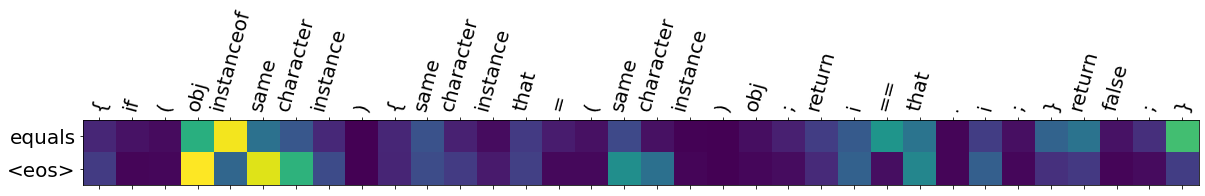

In [54]:
plot_attention_weights(np.transpose(attention_weights['weights']), attention_weights['input_tokens'], attention_weights['output_tokens'], fontsize=20)

In [104]:
def plot_attention(json_path, fontsize=20, **kwargs):
    with open(json_path, 'r') as f:
        attention_weights = json.load(f)

    return plot_attention_weights(
        np.transpose(attention_weights['weights']),
        attention_weights['input_tokens'],
        attention_weights['output_tokens'],
        fontsize=fontsize,
        **kwargs,
    )

<module 'matplotlib.pyplot' from '/home/tony/source/identifier-suggestion/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

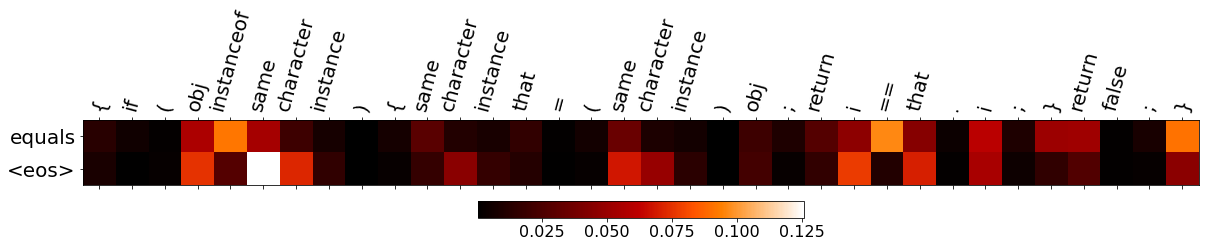

In [142]:
plot_attention('../reports/thesis/attention/id-7-epoch-9.json', x_rotation=75)

<module 'matplotlib.pyplot' from '/home/tony/source/identifier-suggestion/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

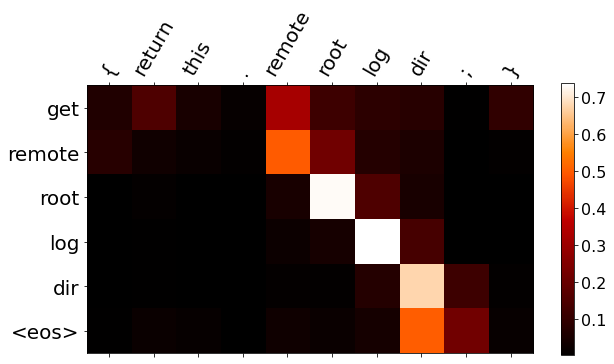

In [143]:
plot_attention('../reports/thesis/attention/id-9-epoch-8.json', figsize=(10,5), colorbar_orientation='vertical', cmap='gist_heat', x_rotation=60)